## 使用梯度上升法求解主成分

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1. 模拟数据

In [2]:
X = np.empty((100, 2)) # 有100个样本，每个样本有2个特征
X[:, 0] = np.random.uniform(0., 100., size=100) # 在0-100之间随机分布
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

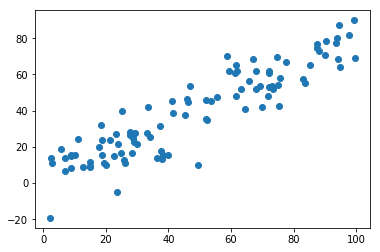

In [3]:
plt.scatter(X[:, 0], X[:, 1])

### 2. 降维

#### 2.1 demean 

In [5]:
def demean(X):
    return X - np.mean(X, axis=0) #np.mean(X, axis=0):每一列的均值

In [6]:
X_demean = demean(X)

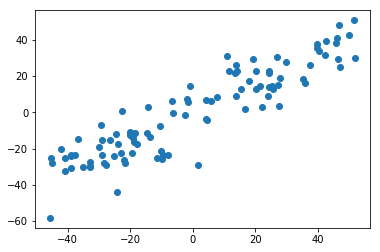

In [7]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])

整体数据的分布是没变的，但是坐标轴的位置发生了改变。也就是X在两个特征方向上的均值都为0

In [8]:
np.mean(X_demean[:, 0]) #基本上为0

1.5205614545266145e-14

In [9]:
np.mean(X_demean[:, 1]) #基本上为0

-3.197442310920451e-15

### 梯度上升法

In [10]:
# 目标函数
def f(w, X):
    return np.sum((X.dot(w) ** 2)) / len(X)

In [11]:
# 梯度
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [12]:
#这里 epsilon设置比较小，是因为w是一个方向向量，为1，所以设置得比较小小
def df_debug(w, X, epsilon=0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
        return res

In [13]:
# 将 w 转换成一个单位向量
def direction(w):
    return w / np.linalg.norm(w) # w / w模
#梯度上升法
def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    w = direction(initial_w) #将其转换成一个单位向量
    i_iter = 0
    while i_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w) # 注意：每次求一个单位方向
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break
        i_iter += 1
    return w

In [14]:
initial_w = np.random.random(X.shape[1]) #注意：不能从0向量开始
initial_w

array([0.29841021, 0.27418804])

In [15]:
eta = 0.001

**注意：不能使用 StandardScaler 标准化数据**

&emsp;&emsp;由于我们的PCA这个过程本身就是要求一个轴，使得我们所有的样本映射到那个轴之后样本的方差最大。但是一旦我们将我们的样本数据进行标准化之后，换句话说，样本的方差就唯一了，这个方差的最大值就不存在了，因为在我们标准化的过程中，把样本间的方差给打掉了，这样一来就求不出PCA真正想最大化的结果了，所以我们在PAC的过程中，绝对不能进行数据归一化。

&emsp;&emsp;其实我们在数据处理的时候，这个标准化的过程进行了一半，这一半就是demean的过程将数据的均值已经变为0了，这就是那一半。但是少做了一半，那一半就是不让我们的数据的方差变为1.

In [17]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.76911804, 0.63910675])

In [18]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.76911804, 0.63910675])

从上述结果可以看出，我们推导的公式是正确的

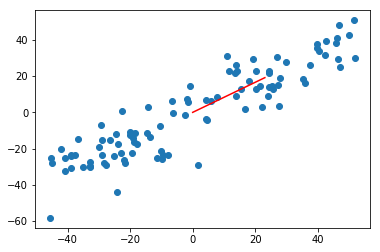

In [20]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0]*30], [0, w[1]*30], color="r")

### 测试极端数据

In [24]:
X2 = np.empty((100, 2)) # 有100个样本，每个样本有2个特征
X2[:, 0] = np.random.uniform(0., 100., size=100) # 在0-100之间随机分布
X2[:, 1] = 0.75 * X2[:, 0] + 3.

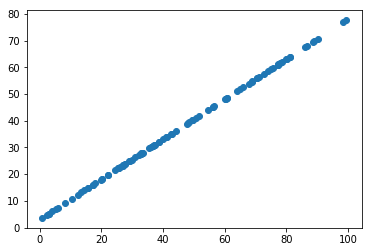

In [25]:
plt.scatter(X2[:, 0], X2[:, 1])

`X2[:, 1] = 0.75 * X2[:, 0] + 3.`

这里选用 0.75，因为这个斜率其实就是这根直线与x轴夹角的tan值，也就是说，在右下角这个直角三角形中，两个直角边分别是3和4，如果我们将其归一化之后，一定是在横轴的方向是0.8，在纵轴的方向是0.6，所以我们使用这样一个极端的数据来验证我们的算法是否正确。

In [26]:
X2_demean = demean(X2)

In [27]:
gradient_ascent(df_math, X2_demean, initial_w, eta)

array([0.79999972, 0.60000037])

确实得出的结果是0.8和0.6，说明我们的算法是正确的

如果我们将其可视化

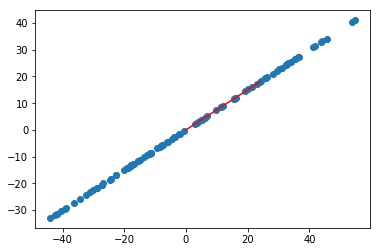

In [29]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)
plt.scatter(X2_demean[:, 0], X2_demean[:, 1])
plt.plot([0, w2[0]*30], [0, w2[1]*30], color="r")